# Assignment 02 - on regularized ploynomial regression model

# Question-1

Generate 20 real number for the variable X from the uniform distribution U [0,1]

In [ ]:
import numpy as np

In [ ]:
#### generating N uniformly distributed random variable.

def generate_X(N):
  X = []
  for i in range(N):
    X = np.random.uniform(size = N)
  return X

In [ ]:
X = generate_X(20)
print('20 Uniformly distributed random variables are :')
print(X)

20 Uniformly distributed random variables are :
[0.30807182 0.13219552 0.04695666 0.73648441 0.65697672 0.12154922
 0.41273529 0.8793672  0.13816935 0.21670248 0.20166236 0.4846241
 0.46928919 0.00208957 0.42282538 0.73525597 0.87920432 0.79292154
 0.77245922 0.8155264 ]


# Question-2

Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 20 ,y 20 )} using the relation Yi = sin(2 π x i ) + ϵ i where ϵ i ~ N(0,0.25)

In [ ]:
import math

In [ ]:
##### Generating Y values according to the given X values

def generate_Y(X, N):
  PI = math.pi
  Exp = 2*PI*X
  Epsilon = np.random.normal(0, 0.25, size = N)
  # print(Epsilon)
  Y = np.sin(Exp) + Epsilon
  return Y

In [ ]:
Y = generate_Y(X, 20)
print('20 output for X datapoints are :')
print(Y)

20 output for X datapoints are :
[ 0.75630441  0.76793551  0.49236701 -0.95149825 -0.56386562  0.66423384
  0.18723774 -0.35502175  0.30254787  0.39809965  1.81526971  0.36465392
  0.44091484  0.18303883  0.38277106 -0.85916986 -0.62297876 -1.12446832
 -1.08214868 -0.96133522]


In [ ]:
##### Making a zipped dataset based on the X and Y values

def create_XY_set(X, Y):
  result = np.array(list(zip(X,Y)))
  # print(result)
  return result

In [ ]:
training_set = create_XY_set(X, Y)
training_set

array([[ 0.30807182,  0.75630441],
       [ 0.13219552,  0.76793551],
       [ 0.04695666,  0.49236701],
       [ 0.73648441, -0.95149825],
       [ 0.65697672, -0.56386562],
       [ 0.12154922,  0.66423384],
       [ 0.41273529,  0.18723774],
       [ 0.8793672 , -0.35502175],
       [ 0.13816935,  0.30254787],
       [ 0.21670248,  0.39809965],
       [ 0.20166236,  1.81526971],
       [ 0.4846241 ,  0.36465392],
       [ 0.46928919,  0.44091484],
       [ 0.00208957,  0.18303883],
       [ 0.42282538,  0.38277106],
       [ 0.73525597, -0.85916986],
       [ 0.87920432, -0.62297876],
       [ 0.79292154, -1.12446832],
       [ 0.77245922, -1.08214868],
       [ 0.8155264 , -0.96133522]])

In [ ]:
print(training_set.shape)

(20, 2)


# Question-3

In the similar way construct a testing set of size 50 I,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}

In [ ]:
##### Appling same procedure as Question 1 and 2

test_X = generate_X(50)

In [1]:
test_y = generate_Y(test_X, 50)

NameError: name 'generate_Y' is not defined

In [ ]:
testing_set = create_XY_set(test_X, test_y)

In [ ]:
print(testing_set.shape)
print(testing_set)

(50, 2)
[[ 0.02616172  0.06716599]
 [ 0.74814186 -1.13298248]
 [ 0.54584857 -0.10584065]
 [ 0.50168805 -0.27701118]
 [ 0.38128847  1.08174054]
 [ 0.56883736 -0.11937556]
 [ 0.56258557 -0.20784184]
 [ 0.06787243  0.73022767]
 [ 0.2292764   1.36185016]
 [ 0.29194893  1.04219279]
 [ 0.1936562   0.94774542]
 [ 0.75699086 -0.85643334]
 [ 0.21918769  1.11123811]
 [ 0.92558685 -0.76242623]
 [ 0.65333183 -0.96200724]
 [ 0.57810854 -0.22877852]
 [ 0.23546086  1.52065853]
 [ 0.69782842 -0.60566036]
 [ 0.86522448 -0.44703079]
 [ 0.61657865 -0.62350975]
 [ 0.92868063 -0.38747316]
 [ 0.128175    1.00595189]
 [ 0.95053336 -0.05936423]
 [ 0.06156531  0.66746074]
 [ 0.31791679  1.06460344]
 [ 0.35359778  1.13745767]
 [ 0.11962355  0.65802993]
 [ 0.9999299   0.22240672]
 [ 0.5232243  -0.25981973]
 [ 0.26974188  1.03286362]
 [ 0.02940766 -0.0757052 ]
 [ 0.37079184  0.86878052]
 [ 0.56277135 -0.21547254]
 [ 0.20375958  1.14608131]
 [ 0.06503242  0.1720405 ]
 [ 0.79666203 -1.12985858]
 [ 0.61315711 -0.422

# Question-4 & Question-5

4.) Estimate the regularized Least Square polynomial regression model of order M= 1,2, 3,
9, using the training set T.


5.) List the value of coefficients of estimated regularized polynomial regression models for
each case.

In [ ]:
##### Function to calculate the weight vector for a given degree and lambda value

def polynomial_regression_parameters(X, Y, degree, lamb):
  rows = len(X)
  cols = degree+1
  X_matrix = np.zeros((rows,cols))
  for m in range(cols):
    X_matrix[:,m] = X**m
  w_optimal = np.linalg.inv((X_matrix.T @ X_matrix) + lamb * np.identity(degree+1)) @ X_matrix.T @ Y
  return w_optimal

In [ ]:
train_X, train_Y = zip(*training_set)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [ ]:
##### the parameters are in the form of coefficient starting from 1 to the highest power of x

lamb = 0.01
degree_list = [1,2,3,9]
w_cap_matrix = np.zeros((len(degree_list), max(degree_list)+1))   ####this will generate a weight matrix of size 4x10.

for i in range(len(degree_list)):
  w_cap = polynomial_regression_parameters(train_X, train_Y, degree_list[i], lamb)
  w_cap_matrix[i, 0:len(w_cap)] = w_cap
  print('The optimal weight value for polynomial regression of degree {} is : {}'.format(degree_list[i], w_cap))


The optimal weight value for polynomial regression of degree 1 is : [ 0.96791695 -2.07403705]
The optimal weight value for polynomial regression of degree 2 is : [ 0.65285256  0.29178531 -2.59030985]
The optimal weight value for polynomial regression of degree 3 is : [ 0.6415244   0.73354157 -4.32753062  1.50484123]
The optimal weight value for polynomial regression of degree 9 is : [ 0.48322926  1.99119735 -3.59676387 -2.9801818  -1.3928876   0.01126229
  1.05873893  1.78088183  2.24260638  2.50586879]


In [ ]:
print(w_cap_matrix.shape)
print(w_cap_matrix)

(4, 10)
[[ 0.96791695 -2.07403705  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.65285256  0.29178531 -2.59030985  0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.6415244   0.73354157 -4.32753062  1.50484123  0.          0.
   0.          0.          0.          0.        ]
 [ 0.48322926  1.99119735 -3.59676387 -2.9801818  -1.3928876   0.01126229
   1.05873893  1.78088183  2.24260638  2.50586879]]


# Question-6

Obtain the prediction on testing set and compute the RMSE for regularized polynomial
regression models for order M =1,2,3 and 9 .

In [ ]:
##### Function to predict the estimated Y values based on the given weights and X values

def predict_Y(W, X):
  X_matrix = np.zeros((10, len(X)))      #####This will create and X matrix of shape 10x50
  for i in range(10):
    X_matrix[i,:] = X**i
  predicted_Y_matrix = W @ X_matrix
  return predicted_Y_matrix

In [ ]:
###### Function to calculate the RMSE based on actual and estimated Y values

def calculate_RMSE(Y, Y_real):
  error = np.subtract(Y, Y_real)
  squared_error = np.square(error)
  total_squared_error = squared_error.sum(axis = 1)     #### to sum all the values in each row
  total_mean_squared_error = total_squared_error/len(Y[0])
  total_root_mean_squared_error = np.sqrt(total_mean_squared_error)
  return total_mean_squared_error

In [ ]:
test_X, test_Y = zip(*sorted(testing_set, key = lambda x:x[0]))
test_X = np.array(test_X)
test_Y = np.array(test_Y)

In [ ]:
estimated_Y_matrix_on_testing_set = predict_Y(w_cap_matrix, test_X.T)

In [ ]:
print(estimated_Y_matrix_on_testing_set.shape)
print(estimated_Y_matrix_on_testing_set)

(4, 50)
[[ 0.91999671  0.91365657  0.90692437  0.84022823  0.83303729  0.82714701
   0.78508446  0.71981328  0.70207725  0.6742158   0.66014705  0.59884051
   0.56626682  0.54531204  0.51331355  0.49238921  0.47956239  0.42605334
   0.4084623   0.36240405  0.30854574  0.27553627  0.23454204  0.19888094
   0.17711053  0.08689525 -0.07260266 -0.11726963 -0.16419322 -0.19890636
  -0.19929168 -0.21187281 -0.23110157 -0.2487981  -0.2960741  -0.30379362
  -0.31089003 -0.38711748 -0.47940505 -0.58375699 -0.60211013 -0.68438962
  -0.77491641 -0.82659067 -0.84723254 -0.87363404 -0.95178447 -0.95820108
  -1.00352447 -1.10597472]
 [ 0.65821142  0.65871327  0.65919316  0.6609984   0.66087309  0.66072405
   0.65844515  0.65069016  0.64769638  0.64222847  0.6391122   0.62275001
   0.61221492  0.60476222  0.59236142  0.58358551  0.5779451   0.55227781
   0.54308657  0.51725604  0.48381058  0.46158534  0.43215715  0.40491131
   0.38752536  0.30939541  0.14728034  0.09638901  0.04033862 -0.00283283
  -

In [ ]:
###### calculate actual Y-matrix of shape 4x50 using the testing_set

actual_y_matrix_on_testing_set = np.zeros(estimated_Y_matrix_on_testing_set.shape)
for i in range(4):
  actual_y_matrix_on_testing_set[i,:] = test_Y.T

##### calculating the matrix for RMSE for all given degree list

RMSE_matrix_on_testing_set = calculate_RMSE(estimated_Y_matrix_on_testing_set, actual_y_matrix_on_testing_set)

In [ ]:
print(RMSE_matrix_on_testing_set.shape)
print(RMSE_matrix_on_testing_set)

(4,)
[0.30648507 0.32630954 0.28674178 0.20495544]


# Question-7

Plot the estimate obtained by regularized polynomial regression models for order M
=1,2,3 and 9 for training set along with y 1, y 2, , y 20. . Also plot our actual
mean estiamte E(Y/X) = sin(2 π x i ) .

In [ ]:
train_X, train_Y = zip(*sorted(training_set, key = lambda x:x[0]))
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [ ]:
estimated_Y_matrix_on_training_set = predict_Y(w_cap_matrix, train_X.T)

In [ ]:
print(estimated_Y_matrix_on_training_set.shape)
print(estimated_Y_matrix_on_training_set)

(4, 20)
[[ 0.96358311  0.8705271   0.71581937  0.69373854  0.6813486   0.54966174
   0.51846798  0.32896457  0.11188866  0.09096144 -0.00540621 -0.0372114
  -0.39467712 -0.55703118 -0.55957901 -0.6341921  -0.6766317  -0.72351503
  -0.85558539 -0.85592321]
 [ 0.65345096  0.66084238  0.65004905  0.64615791  0.64371734  0.60635271
   0.59444231  0.49690163  0.33202229  0.31312782  0.21931426  0.18589724
  -0.27347671 -0.53293553 -0.53726023 -0.66737558 -0.74437601 -0.83196067
  -1.09291866 -1.09361309]
 [ 0.6430383   0.66658297  0.66945233  0.66634536  0.66423088  0.62580279
   0.61257777  0.50078892  0.31289106  0.29175869  0.18823467  0.15192985
  -0.3176801  -0.56045881 -0.56437854 -0.68043973 -0.74745213 -0.82220614
  -1.03599694 -1.03654851]
 [ 0.48737427  0.56848332  0.66646709  0.67629822  0.68132805  0.71186876
   0.7125923   0.65726573  0.45416219  0.42620033  0.27851994  0.2231569
  -0.55003346 -0.86331193 -0.86695017 -0.94442521 -0.95707665 -0.93615225
  -0.59862537 -0.59708642

In [ ]:
###### calculate actual Y-matrix of shape 4x50 using the testing_set
actual_y_matrix_on_training_set = np.zeros(estimated_Y_matrix_on_training_set.shape)
for i in range(4):
  actual_y_matrix_on_training_set[i,:] = train_Y.T

##### calculating the matrix for RMSE for all given degree list
RMSE_matrix_on_training_set = calculate_RMSE(estimated_Y_matrix_on_training_set, actual_y_matrix_on_training_set)

In [ ]:
print(RMSE_matrix_on_training_set.shape)
print(RMSE_matrix_on_training_set)

(4,)
[0.20953066 0.17586231 0.16500163 0.0905097 ]


In [ ]:
####### for plotting the estimated values

from matplotlib import pyplot as plt

def plot_values(X, real_Y, estimated_Y, weights, degrees):
  PI = math.pi
  myline = np.linspace(min(X), max(X), 100)
  actual_mean_estimate = np.sin(2*PI*myline)
  color = ['y', 'b', 'g', 'm']
  
  plt.figure(figsize = (8,8))
  plt.scatter(X, real_Y)

  for i in range(len(degrees)):
    estimated_Y_current_degree = estimated_Y[i,:]
    w = weights[i,:]
    polynomial = np.poly1d(np.flip(w,0))
    plt.plot(myline, polynomial(myline), color = color[i], linestyle='--', label = 'M = '+str(degrees[i]))
    
  plt.plot(myline, actual_mean_estimate, '-r', label = 'Actual Mean Estimate')
  plt.legend()
  return plt

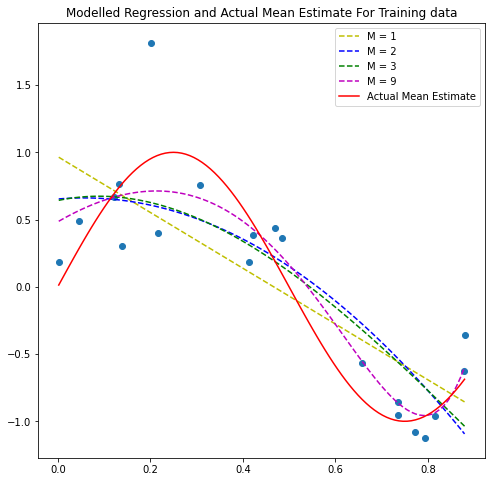

In [ ]:
plt = plot_values(train_X, train_Y, estimated_Y_matrix_on_training_set, w_cap_matrix, degree_list)
plt.title('Modelled Regression and Actual Mean Estimate For Training data')
plt.show()

# Question-8

Plot the estimate obtained by regularized polynomial regression models for order M
=1,2,3 and 9 for testing set along with y’ 1, y’ 2, , y’ 50. . Also plot the sin(2 π x’ i )

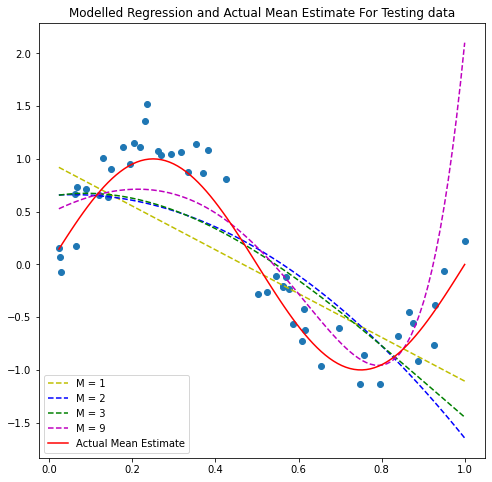

In [ ]:
plt = plot_values(test_X, test_Y, estimated_Y_matrix_on_testing_set, w_cap_matrix, degree_list)
plt.title('Modelled Regression and Actual Mean Estimate For Testing data')
plt.show()

# Question-9

Study the effect of regularization parameter λ on testing RMSE and
flexibility of curve and list your observations.

In [ ]:
lambdas = [0.1, 0.05, 0.01, 0.005, 0.001]

The RMSE value for hyperparameter lambda 0.1 is : [0.30556685 0.30911795 0.32769507 0.19490817]



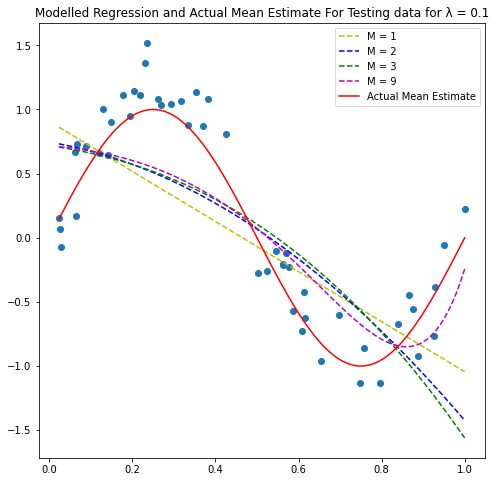


The RMSE value for hyperparameter lambda 0.05 is : [0.30573863 0.31380849 0.32515592 0.16184097]



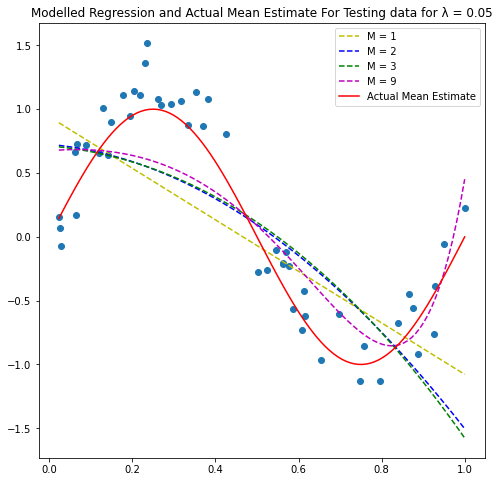


The RMSE value for hyperparameter lambda 0.01 is : [0.30648507 0.32630954 0.28674178 0.20495544]



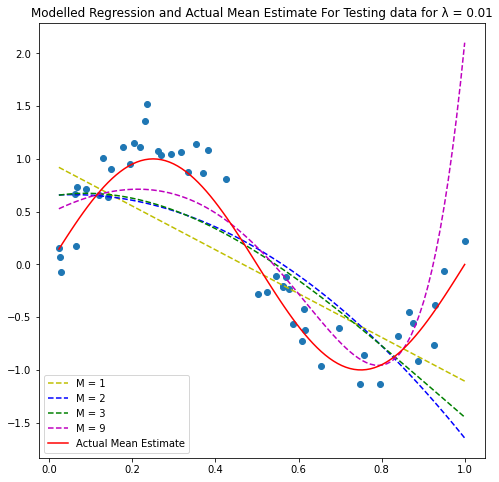


The RMSE value for hyperparameter lambda 0.005 is : [0.30662152 0.32995606 0.24746544 0.24287092]



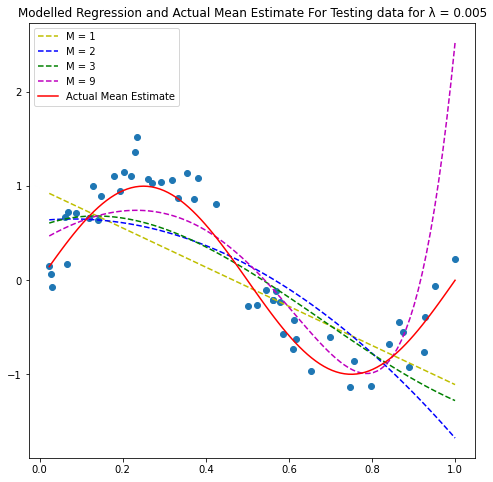


The RMSE value for hyperparameter lambda 0.001 is : [0.30673804 0.33372224 0.12872142 0.25735101]



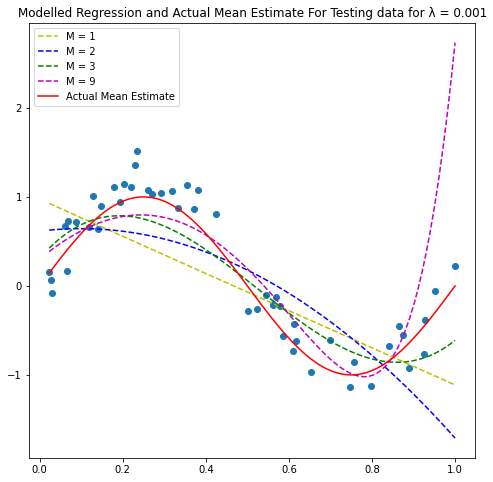

In [ ]:
###### To plot the modelled regression vs actual mean estimate graph for different lambda values

for j in range(len(lambdas)):
  w_cap_matrix_check = np.zeros((len(degree_list), max(degree_list)+1))   ####this will generate a weight matrix of size 4x10.
  for i in range(len(degree_list)):
    w_cap_check = polynomial_regression_parameters(train_X, train_Y, degree_list[i], lambdas[j])
    w_cap_matrix_check[i, 0:len(w_cap_check)] = w_cap_check

  estimated_Y_matrix_on_testing_set_check = predict_Y(w_cap_matrix_check, test_X.T)
  
  ##### calculating the matrix for RMSE for all given degree list
  RMSE_matrix_on_testing_set_check = calculate_RMSE(estimated_Y_matrix_on_testing_set_check, actual_y_matrix_on_testing_set)
  print('The RMSE value for hyperparameter lambda {} is : {}'.format(lambdas[j], RMSE_matrix_on_testing_set_check))
  plt = plot_values(test_X, test_Y, estimated_Y_matrix_on_testing_set_check, w_cap_matrix_check, degree_list)
  plt.title('Modelled Regression and Actual Mean Estimate For Testing data for λ = '+str(lambdas[j]))
  print()
  plt.show()
  print('=======================================================================================================================')
  print()

# Bivariate case

### Part-1

Construct the training set T = { (x 1 ,y 1 ),(x 2 ,y 2 ),……,(x 3 ,y 20 )} using the relation Yi = sin(2 π (||x i ||) +ϵ i, where ϵ i ~ N(0,0.25) and x i = (x i 1 ,x i 2 ) where x i 1, x i 2 are from U[0,1].

In the similar way construct a testing set of size 50 I,e. Test = { (x’ 1 ,y’ 1 ),(x’ 2 ,y’ 2 ),……,(x’ 50 ,y’ 50 )}

In [ ]:
##### generating the uniformly distributed X values for bivariate case

def generate_bivariate_X(N):
  X = []
  for i in range(N):
    X = np.random.uniform(size = N)
  return X

In [ ]:
##### generating the Y values for bivariate case based on the given X1 and X2 values

def generate_bivariate_Y(X1, X2, N):
  PI = math.pi
  Exp = 2 * PI * ((X1**2 + X2**2) ** 0.5)
  Epsilon = np.random.normal(0, 0.25, size = N)
  # print(Epsilon)
  Y = np.sin(Exp) + Epsilon
  return Y

In [ ]:
##### Making the bivariate dataset for given X1, X2 and Y

def create_XY_bivariate_set(X1, X2, Y):
  result = np.array(list(zip(X1, X2, Y)))
  # print(result)
  return result

In [ ]:
x1 = np.array(sorted(generate_bivariate_X(20)))
x2 = np.array(sorted(generate_bivariate_X(20)))
y = generate_bivariate_Y(x1, x2, 20)

training_set_bivariate = create_XY_bivariate_set(x1, x2, y)
training_set_bivariate

array([[ 0.07952465,  0.09921662,  0.83417925],
       [ 0.15631853,  0.16916276,  0.91212667],
       [ 0.17688961,  0.20765788,  1.1007951 ],
       [ 0.18258784,  0.23949866,  0.91437523],
       [ 0.23342265,  0.26607836,  0.55655006],
       [ 0.30353257,  0.3182806 ,  0.58559527],
       [ 0.3198586 ,  0.35547146,  0.5146329 ],
       [ 0.33167066,  0.40854329, -0.01045848],
       [ 0.33424153,  0.40878305, -0.38891307],
       [ 0.36729578,  0.41995781,  0.02313172],
       [ 0.39342076,  0.52344736, -0.99601993],
       [ 0.43393259,  0.57276576, -1.37386308],
       [ 0.45118996,  0.57980235, -0.91779832],
       [ 0.48050022,  0.58891908, -0.83669863],
       [ 0.49950648,  0.62979846, -0.78105257],
       [ 0.58606498,  0.70971382, -0.43701719],
       [ 0.62697795,  0.74341197, -0.27439202],
       [ 0.63462949,  0.85807896,  0.36708863],
       [ 0.87851489,  0.89143492,  0.73459681],
       [ 0.88154134,  0.97727482,  0.86448026]])

In [ ]:
x1 = np.array(sorted(generate_bivariate_X(50)))
x2 = np.array(sorted(generate_bivariate_X(50)))
y = generate_bivariate_Y(x1, x2, 50)

testing_set_bivariate = create_XY_bivariate_set(x1, x2, y)
testing_set_bivariate

array([[ 0.00177017,  0.0312282 ,  0.20949457],
       [ 0.00269535,  0.04660268,  0.27617767],
       [ 0.00642524,  0.05064443,  0.45399366],
       [ 0.01243388,  0.05089135,  0.61385514],
       [ 0.01529624,  0.0967482 ,  1.03397603],
       [ 0.03444427,  0.13322995,  0.44757069],
       [ 0.04090458,  0.18478013,  1.16584033],
       [ 0.08073801,  0.20315115,  1.0146336 ],
       [ 0.10515934,  0.23972941,  0.67913636],
       [ 0.11808511,  0.24907974,  1.33427751],
       [ 0.16488203,  0.2761741 ,  0.92541801],
       [ 0.16692337,  0.34763287,  0.7319986 ],
       [ 0.20266824,  0.3561471 ,  0.59781893],
       [ 0.22570523,  0.37720373,  0.38799401],
       [ 0.24905112,  0.39010438,  0.2636278 ],
       [ 0.25863087,  0.42506248,  0.21640702],
       [ 0.3059356 ,  0.42613365, -0.12813256],
       [ 0.33725213,  0.4334157 , -0.36258868],
       [ 0.34074017,  0.44275551, -0.76860302],
       [ 0.34959983,  0.4845839 , -0.17590919],
       [ 0.39891443,  0.49568581, -0.636

### Part-2

Obtain the prediction on testing set and compute the RMSE for
regularized polynomial regression models for order M =1,2 and 5 .
Also plot the estimated function and target function for the training
set and testing set.

In [ ]:
####### model creation and generating the estimation values and RMSE for different values of M

train_X1, train_X2, train_Y_bv = zip(*training_set_bivariate)
train_X1 = np.array(train_X1)
train_X2 = np.array(train_X2)
train_Y_bv = np.array(train_Y_bv)

In [ ]:
test_X1, test_X2, test_Y_bv = zip(*testing_set_bivariate)
test_X1 = np.array(test_X1)
test_X2 = np.array(test_X2)
test_Y_bv = np.array(test_Y_bv)

In [ ]:
def generate_single_col_vector(x, y, M):
  v = []
  for j in range(M+1):
    x_pow = j
    y_pow = 0
    while x_pow >= 0:
      v.append((x**x_pow) * (y**y_pow))
      x_pow = x_pow-1
      y_pow = y_pow+1
  return v

In [ ]:
def generate_bivariate_x_matrix(X1, X2, M):
  rows = int((M+1)*(M+2)/2)
  x_matrix = np.zeros((len(X1), rows))
  for j in range(len(X1)):
    single_col_vector = generate_single_col_vector(X1[j], X2[j], M)
    x_matrix[j,:] = single_col_vector
  return x_matrix

In [ ]:
##### ALTHOUGH We were asked to print values of RMSE on M = 1,2,5 only ,
##### but I calculated both training and testing RMSE for many M values to find the point of overfitting

M_list = np.array([1,2,3,4,5,6,7,8,9])
lamb = 0.001
values_in_eq = (M_list+1) * (M_list+2)/2
w_matrix_bivariate = []

for i in range(len(values_in_eq)):
  M = M_list[i]
  val = values_in_eq[i]
  
  x_matrix_bivariate = generate_bivariate_x_matrix(train_X1, train_X2, M)
  w_optimal_bivariate = np.linalg.inv((x_matrix_bivariate.T @ x_matrix_bivariate) + lamb * np.identity(int(val))) @ x_matrix_bivariate.T @ train_Y_bv
  w_matrix_bivariate.append(w_optimal_bivariate)
  y_est_bivariate = w_optimal_bivariate @ (x_matrix_bivariate.T)
  RMSE_bivariate = ((np.sum((y_est_bivariate - train_Y_bv)**2))/3)**0.5
  print('For M value : '+str(M))
  print('Training RMSE : '+str(RMSE_bivariate))

  x_matrix_bivariate_test = generate_bivariate_x_matrix(test_X1, test_X2, M)
  y_est_bivariate_test = w_optimal_bivariate @ (x_matrix_bivariate_test.T)
  RMSE_bivariate_test = ((np.sum((y_est_bivariate_test - test_Y_bv)**2))/3)**0.5
  print('Testing RMSE : '+str(RMSE_bivariate_test))
  print('============================================================================')


For M value : 1
Training RMSE : 1.4863134114789958
Testing RMSE : 4.307052270016573
For M value : 2
Training RMSE : 0.8721363921319141
Testing RMSE : 3.0224172546609047
For M value : 3
Training RMSE : 0.7008344685442408
Testing RMSE : 2.7508746714635497
For M value : 4
Training RMSE : 0.6322950863835974
Testing RMSE : 2.7444112857331144
For M value : 5
Training RMSE : 0.5383074571729403
Testing RMSE : 2.6004993130363583
For M value : 6
Training RMSE : 0.46396531760194354
Testing RMSE : 2.539231068243873
For M value : 7
Training RMSE : 0.4256967369583911
Testing RMSE : 2.6945218795385015
For M value : 8
Training RMSE : 0.4119514874803883
Testing RMSE : 3.042750993906545
For M value : 9
Training RMSE : 0.40951701973344234
Testing RMSE : 3.504176775208801


# **Although, We were asked to print values of RMSE on M = 1,2,5 only but I calculated both training and testing RMSE for many M values to find the optimal M value**

**As we can see from result that till M = 6, RMSE for both training and testing data were decreasing but from M = 7 onwards, RMSE for training data kept on decreasing but for testing data, it started increasing. One of the reasons for that can be overfitting**

In [ ]:
w_matrix_bivariate

[array([ 0.65346048,  9.27496248, -8.94319572]),
 array([  2.37299126,   7.06750444, -15.5725997 ,  -2.58162983,
          0.7284218 ,   9.35457863]),
 array([  1.62536691,   8.71546261, -10.56815067,   1.68425235,
         -3.47916781,  -4.68253392,  -1.97901098,  -2.94731155,
          0.90809177,  12.02975005]),
 array([ 1.58213538,  7.31713409, -9.04844438,  3.74546918, -3.18404099,
        -7.16616857,  3.81583155,  0.59837122,  0.93853388,  6.77338079,
        -1.33593006, -4.80849498, -5.43127414, -1.66076389,  8.66399516]),
 array([ 1.4049904 ,  6.75456623, -6.75607539,  2.46132855, -4.15494041,
        -9.43599962,  4.64897274,  1.66890214,  0.82459668,  3.3540183 ,
         2.90192961,  0.44002734, -0.15891043,  2.13703411,  8.77688037,
        -0.94656135, -4.10681477, -6.01256397, -5.91414839, -2.75927562,
         4.91938329]),
 array([  1.22367535,   6.31691973,  -4.91269738,   1.37402266,
         -4.30164978, -10.0401968 ,   3.58954998,   1.33026287,
          0.0494776

### plotting values

In [ ]:
##### Plotting the 3D plots of estimation function vs Target function over scattered train and test data points

%matplotlib notebook

In [ ]:
def actual_values(X1, X2):
  PI = math.pi
  Exp = 2 * PI * ((X1**2 + X2**2) ** 0.5)
  actual_Z = np.sin(Exp)
  return actual_Z

In [ ]:
def estimation_model(w, x, y, M):
  v = []
  for j in range(M+1):
    x_pow = j
    y_pow = 0
    while x_pow >= 0:
      v.append((x**x_pow) * (y**y_pow))
      x_pow = x_pow-1
      y_pow = y_pow+1
  new_vec = np.dot(w, v)
  return np.sum(new_vec)

In [ ]:
x_axis = np.linspace(0, 1, 1000)
y_axis = np.linspace(0, 1, 1000)

X, Y = np.meshgrid(x_axis, y_axis)

In [ ]:
z = actual_values(X, Y)

In [ ]:
##### Estimated values for M=1

z_est_for_m1 = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        z_est_for_m1[i][j] = estimation_model(w_matrix_bivariate[0], X[i][j], Y[i][j], 1)

# Training points are scattered as black balls and testing points are scattered as red balls. The blue curve in the 3D plot is out 'Estimation Function' curve while the magenta curve is the 'Target Function'.

<IPython.core.display.Javascript object>


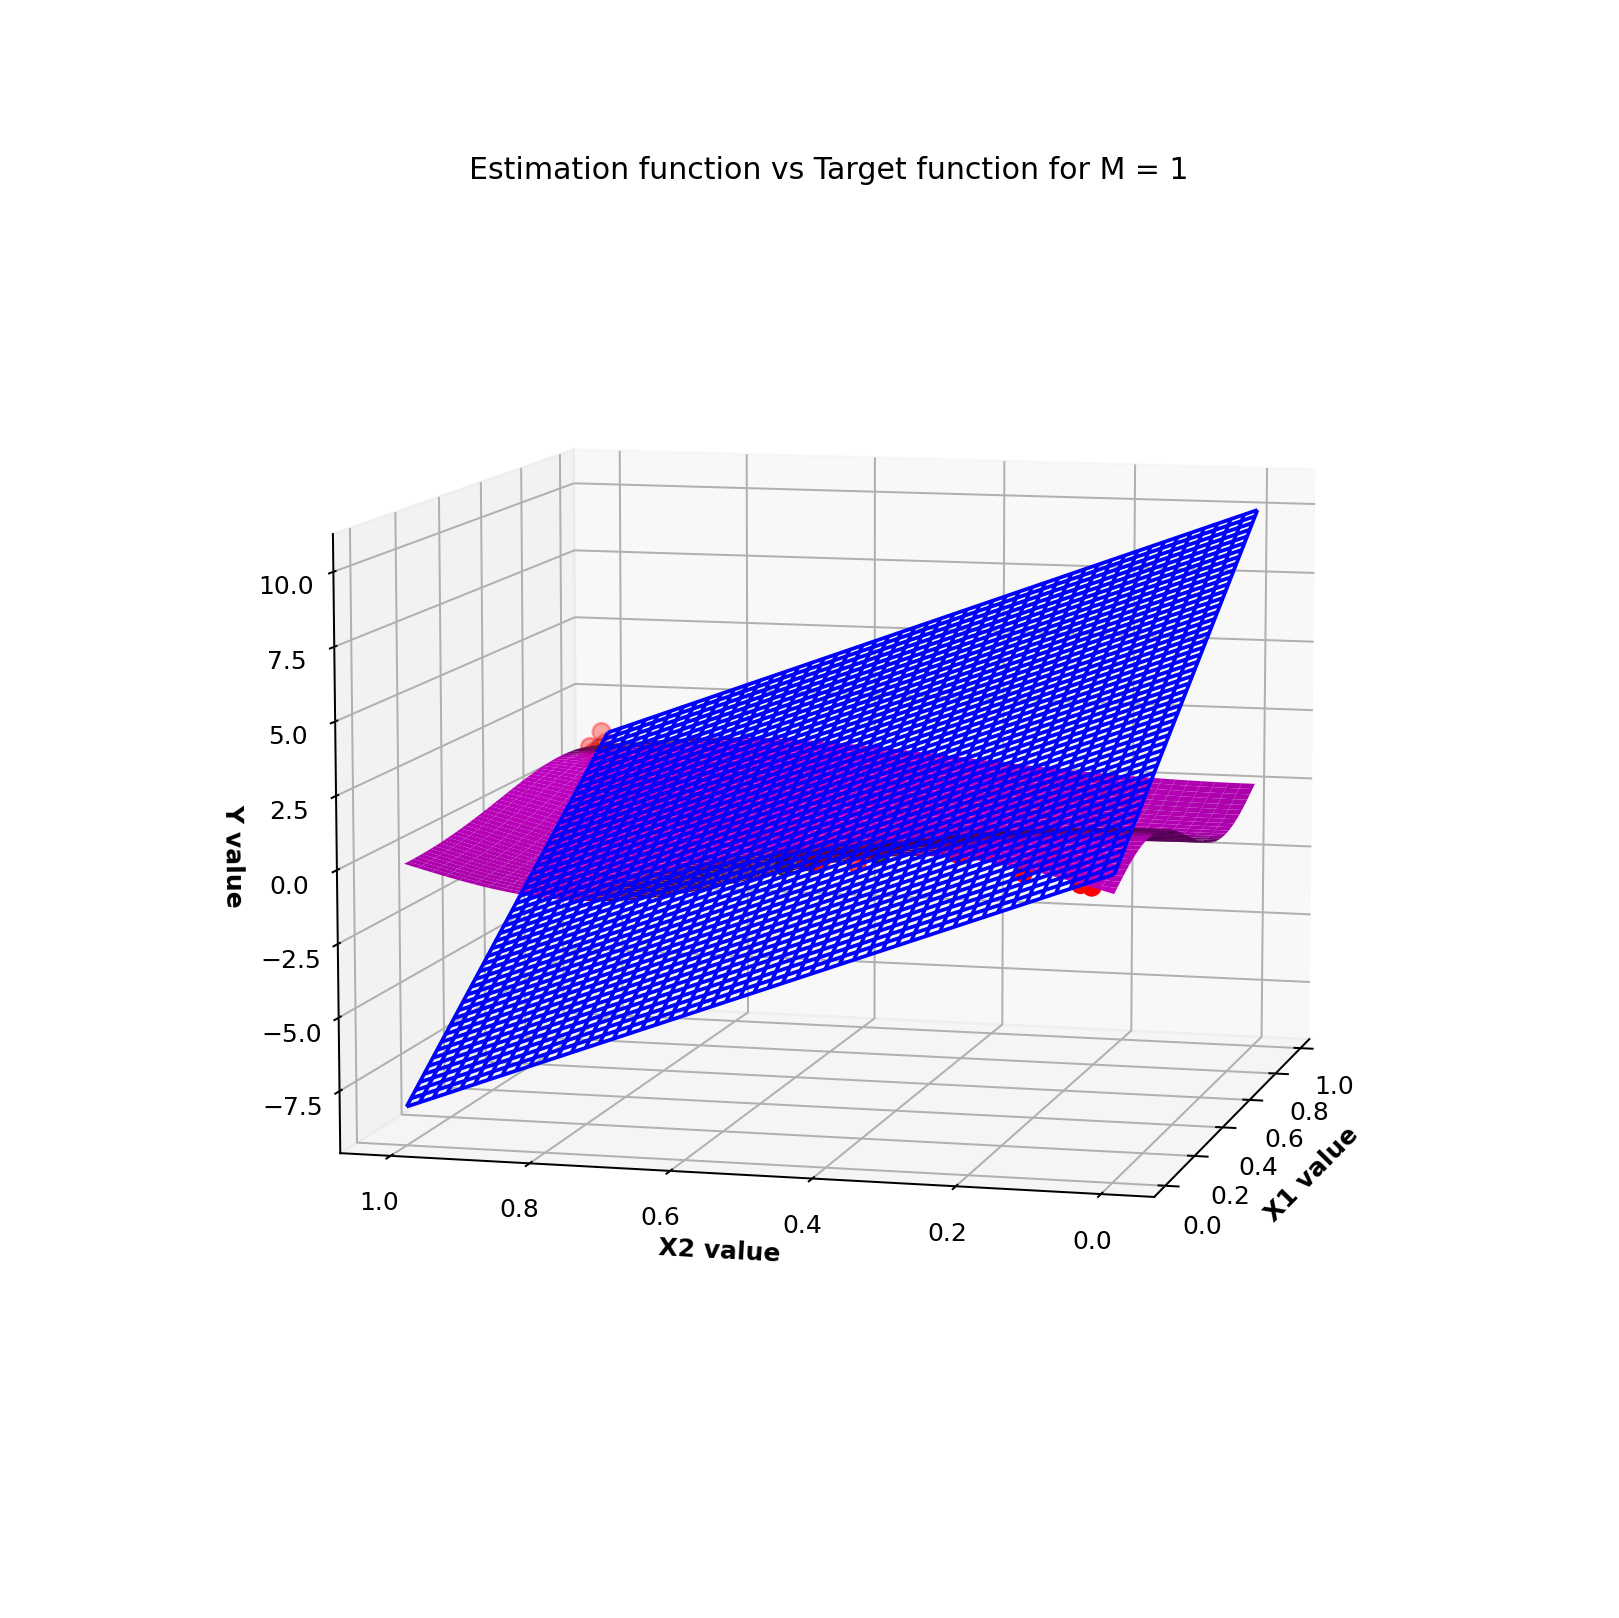

In [ ]:
##### plot for Estimated values for M=1

fig1 = plt.figure(figsize = (5,5))

ax = plt.axes(projection ="3d")
ax.scatter3D(train_X1, train_X2, train_Y_bv, s=50, label = 'Training Data', color = "k")
ax.scatter3D(test_X1, test_X2, test_Y_bv, s=50, label = 'Testing Data', color = "r")
ax.plot_surface(X, Y, z, color = "m", label = 'Target Function')
ax.plot_wireframe(X, Y, z_est_for_m1, color = "blue", label = 'Estimation Function');

plt.title("Estimation function vs Target function for M = 1")
ax.set_xlabel('X1 value', fontweight ='bold')
ax.set_ylabel('X2 value', fontweight ='bold')
ax.set_zlabel('Y value', fontweight ='bold')

plt.show()

In [ ]:
plt.close(fig1)

In [ ]:
##### Estimated values for M=2

z_est_for_m2 = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        z_est_for_m2[i][j] = estimation_model(w_matrix_bivariate[1], X[i][j], Y[i][j], 2)

<IPython.core.display.Javascript object>


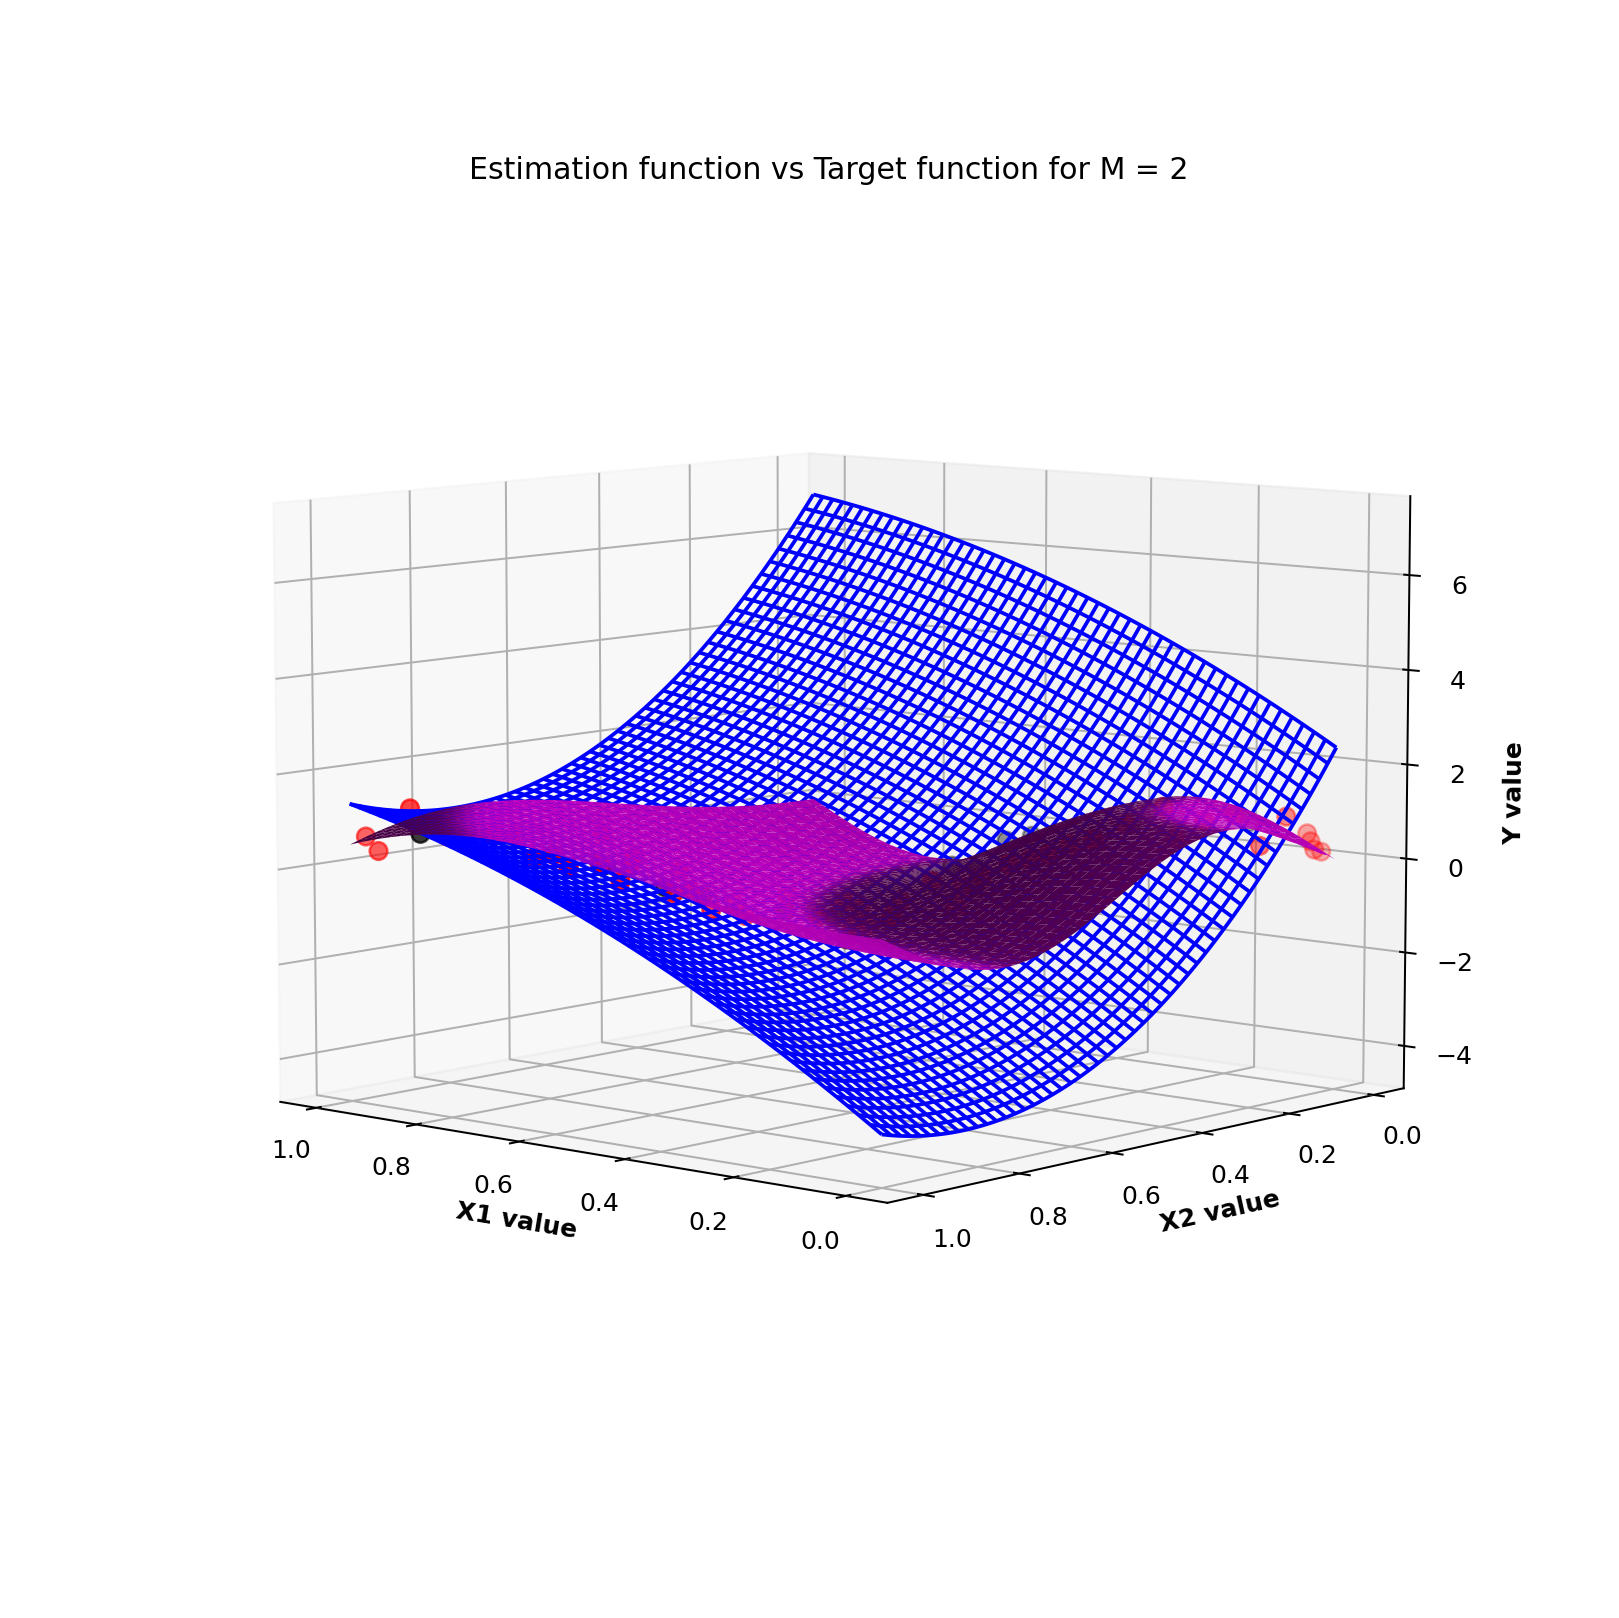

In [ ]:
##### plot for Estimated values for M=2

fig2 = plt.figure(figsize = (5,5))

ax = plt.axes(projection ="3d")
ax.scatter3D(train_X1, train_X2, train_Y_bv, s=50, color = "k")
ax.scatter3D(test_X1, test_X2, test_Y_bv, s=50, color = "r")
ax.plot_surface(X, Y, z, color = "m")
ax.plot_wireframe(X, Y, z_est_for_m2, color = "blue");

plt.title("Estimation function vs Target function for M = 2")
ax.set_xlabel('X1 value', fontweight ='bold')
ax.set_ylabel('X2 value', fontweight ='bold')
ax.set_zlabel('Y value', fontweight ='bold')

plt.show()

In [ ]:
plt.close(fig2)

In [ ]:
##### Estimated values for M=5

z_est_for_m5 = np.zeros((1000,1000))
for i in range(1000):
    for j in range(1000):
        z_est_for_m5[i][j] = estimation_model(w_matrix_bivariate[4], X[i][j], Y[i][j], 5)

<IPython.core.display.Javascript object>


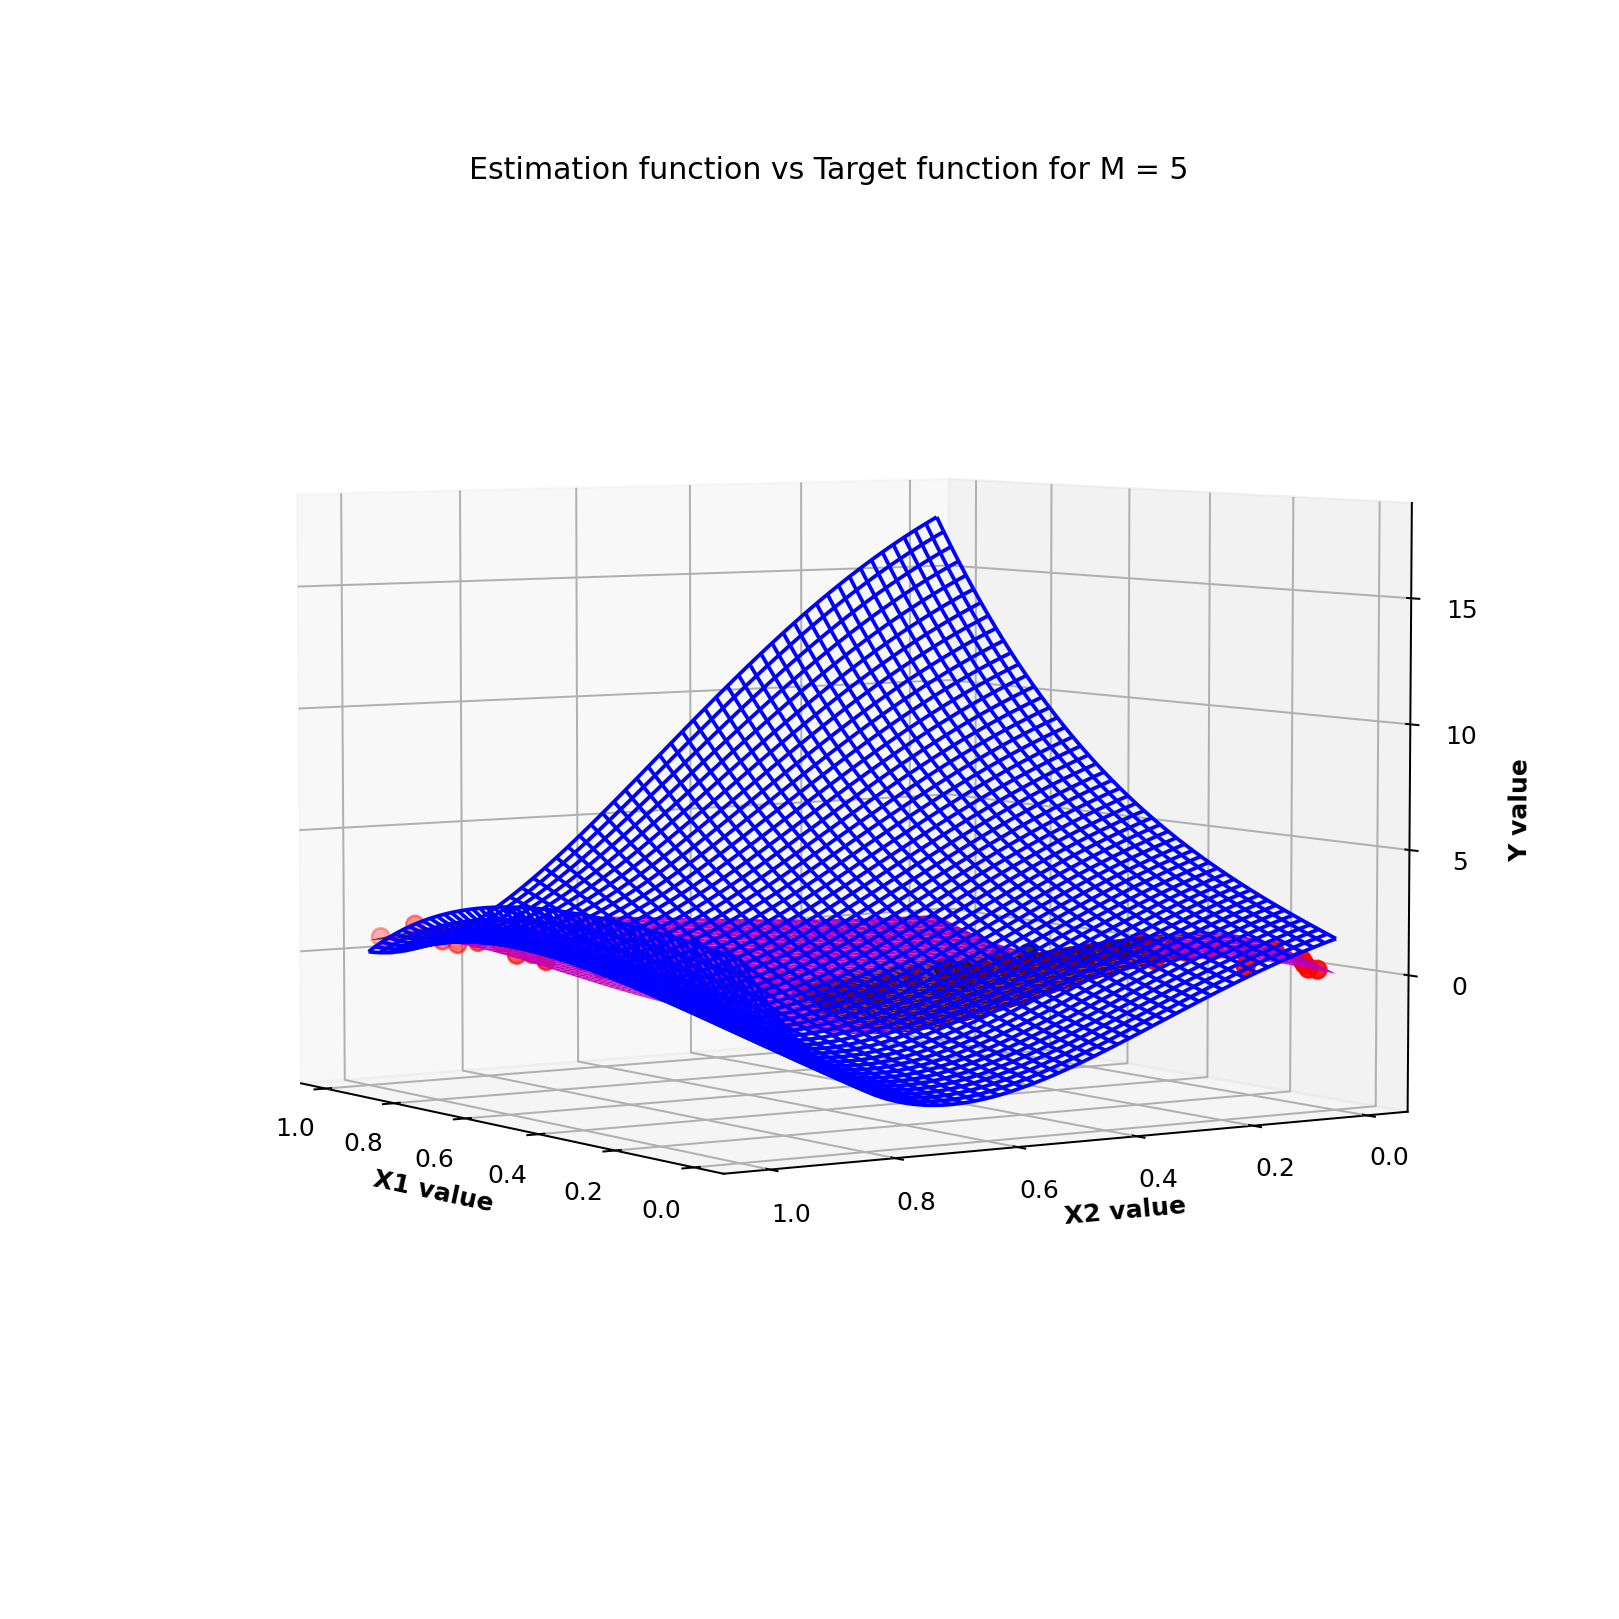

In [ ]:
##### Plot for Estimated values for M=1

fig3 = plt.figure(figsize = (5,5))

ax = plt.axes(projection ="3d")
ax.scatter3D(train_X1, train_X2, train_Y_bv, s=50, color = "k")
ax.scatter3D(test_X1, test_X2, test_Y_bv, s=50, color = "r")
ax.plot_surface(X, Y, z, color = "m")
ax.plot_wireframe(X, Y, z_est_for_m5, color = "blue");

plt.title("Estimation function vs Target function for M = 5")
ax.set_xlabel('X1 value', fontweight ='bold')
ax.set_ylabel('X2 value', fontweight ='bold')
ax.set_zlabel('Y value', fontweight ='bold')

plt.show()

In [ ]:
plt.close(fig3)

# **REPORT**

## Question-1

We have created a function generate_X() to generate 20 random values of X are generated using the function 

```
numpy.random.uniform()
```
for complete code, check section 'Question-1'

## Question-2

We made another function generate_Y() to calculate equivalent Y values to their corresponding X. numpy.sin(2\*PI\*X) function is used to calculate the actual mean estimate values and numpy.random.normal() is used to generate 20 epsilon values. Both these values are added to generate Y for our training data.

Both these X and Y are zipped together to generate training data.

## Question-3

Function defined for question 1 and 2 are used to generate 50 testing data-points in similar fashion.

## Question-4 and Question-5

Function ***polynomial_regression_parameters()*** is created to calculate the least square polynomial's coefficient. This function also takes input the degree of the polynomial and the value of lambda to regularise the model. It calculates using the formula for least square polynomial coefficient that coded from scratch in this function.

So, it is further used to generate the coefficient of polynomial for all different degree M = 1,2,3,9 and these coefficients are stored in a single matrix named ***w_cap_matrix*** .

These least square weights are also printed.(check section "Question-4 & Question-5")

## Question-6

Two functions are created ***predict_Y()*** and ***calculate_RMSE()*** for this question. In first function, it is used to calculate the estimated Y values for testing data-points using the *w_cap_matrix* calculated in previous section.

The second function is used to calculate the root mean square error using the estimated Y values and actual Y values from testing dataset.

Prediction values and RMSE are printed in the section "Question-6".

## Question-7

The same functions defined in question-6 are used to calculate the estimated Y values for training data-point in this question.

Further, we have plotted the figure containing our polynomial regression model for all the degree M=1,2,3,9 and actual mean estimated values.

**Check section "Question-7" to analyse the diagram**

## Question-8

We used the estimated Y values for testing data in question-6 to plot the figure containing our polynomial regression model for all the degree M=1,2,3,9 and actual mean estimated values.

**Check section "Question-8" to analyse the diagram**

## Question-9

To study the effect of lambda, we have used 5 different values of lambda and then calculated the RMSE value all M value in each case of lambda.
For the observation, even in our code we have used 4 different M values(1,2,3,9). So, for each value of lambda an on all these M values **root mean square error** are as following in case of testing data:


*   Testing RMSE for lambda = 0.1 is : [0.30556685 0.30911795 0.32769507 0.19490817]

*   Testing RMSE for lambda = 0.05 is : [0.30573863 0.31380849 0.32515592 0.16184097]
*   Testing RMSE for lambda = 0.01 is : [0.30648507 0.32630954 0.28674178 0.20495544]

*   Testing RMSE for lambda = 0.005 is : [0.30662152 0.32995606 0.24746544 0.24287092]
*   Testing RMSE for lambda = 0.001 is : [0.30673804 0.33372224 0.12872142 0.25735101]

## Bivariate Case

### Part-1

Part 1 for creating the test data and training data is almost similar to the question 1, 2 and 3.

### Part-2

Although, We were asked to print values of RMSE on M = 1,2,5 only but I calculated both training and testing RMSE for many M values(1,2,3,4,5,6,7,8,9) to find the optimal M value.
As we can see from result that till M = 6, RMSE for both training and testing data were decreasing but from M = 7 onwards, RMSE for training data kept on decreasing but for testing data, it started increasing. One of the reasons for that can be overfitting. 
Therefore, we can say that M=6 is the best possible value for degree.

Graphs are plotted between Estimation function and Target function. To cross verify check part-2 of bivariate case.
### Training points are scattered as black balls and testing points are scattered as red balls. The blue curve in the 3D plot is out 'Estimation Function' curve while the magenta curve is the 'Target Function'.

# Thank you!

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('PRML02.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/PRML02.ipynb to pdf
[NbConvertApp] Support files will be in PRML02_files/
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Making directory ./PRML02_files
[NbConvertApp] Writing 108002 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 366672 bytes to /content/drive/My Drive/PRML02.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'